# **Empirical Research on Language Learning Curve Analysis for How Developers Learn Different Programming Paradigms**

## Introduction

The aim of this analysis is to explore the learning curves and factors that influence the acquistion of new programming paradigms amongst developers. therefore, the utilization of an empirical study dataset will allow for the exploration of various aspects of developer experience, motivation and proficiency progression over time.

### Dataset Overview

The dataset was curated using SurveyMars and captures the response from 17 participants which includes 17 rows and 35 columns, it captures demographic information, educational, background, professional roles, programming experience, and the detailed insingts into the learning process for specific programming paradigms.

### Analytical Approach
Our analysis begins with data loading and an initial inspection using `df.head()` and `df.info()`. Key steps include:

*   **Data Cleaning:** Unnecessary metadata columns were dropped, and column names were standardized for ease of use.
*   **Descriptive Statistics:** We computed overall descriptive statistics and performed detailed cross-tabulations for categorical variables such as 'Highest Level of Education' and 'Current Role' to understand participant demographics. Consolidated tables have been prepared for publication.
*   **Experience Level Analysis:** Categorical experience levels (e.g., '1-2 years', '3-5 years') were converted into numerical values to calculate and visualize the average years of experience across different programming paradigms (Procedural/Imperative, Object-Oriented, Functional, Concurrent/Parallel, Reactive/Event-driven).
*   **Learning Curve Analysis:** We analyzed self-rated proficiency at different time points (e.g., 'After 1 week', 'After 1 month', 'Now (today)') to plot the average learning curve for programming paradigms.
*   **Difficulty Rating Distribution:** The distribution of self-reported difficulty in learning new paradigms was visualized.
*   **Correlation Analysis:** A correlation heatmap of numerical variables was generated to identify potential relationships within the data.
*   **Inferential Statistics:** A t-test was conducted to compare proficiency levels, and correlations between total years of programming experience and current proficiency were examined.
*   **Categorical Factor Impact:** The influence of different motivations on final skill levels was explored, including a thematic analysis of open-ended responses using word frequencies and a word cloud.

This comprehensive analysis provides insights into how developers learn, the challenges they face, and the factors that contribute to their success in mastering new programming paradigms. therefore, this research, through an empirical survey-based investigation of how developers learn major programming paradigms, addresses gaps in the current research landscape by focusing on the estimation of comparative learning curves. The identification of factors that are associated with successful paradigm acquisition, which are guided by the following research questions, including:

- How does time-to-competency differ across the major programming paradigms, including procedural, object-oriented, functional, declarative, and recurrent/concurrent?

- What are the factors that influence the success of developers' learning and application of programming paradigms, and

 - How is the relative difficulty of the different paradigms perceived by developers?

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "/content/Language Learning Curves Empirical Study of How Developers Learn Different Programming Paradigms._Data obtained.xlsx"
df = pd.read_excel(file_path)

# Making a clean working copy incase changes are made that would be revised
data = df.copy()

# Display first few rows
data.head()


,Index,Submitted Time,Time Spent,Collector,Collector Details,IP Address,1. Do you agree to participate in this study?,2. What is your highest level of education completed?,3. What is your current role?,4. Have you completed formal Computer Science or Software Engineering training?,...,After 6 months,Now (today),13. Which of the following factors has most contributed to your success in learning new programming paradigms?,"14. What was your main motivation for learning this paradigm? (e.g., job requirement, personal interest, academic course, project, etc.)",15. Approximately how many total hours did you spend learning this paradigm from the time you started until now? (Please estimate),"16. On average, how many hours per week did you study this paradigm during the first four weeks?","17. On average, how many hours per week did you study this paradigm after the first four weeks?",18. When did you start actively learning this paradigm? (approximate month and year),19. What specific project or application did you first build using this paradigm?,20. Are there any additional comments or insights about your learning experience you would like to share?
0,1,Oct 30 2025 09:25:56 PM (UTC+01:00) West Afric...,828s,Link,(Empty),102.90.96.242(Unknown/Nigeria),"A Yes, I agree to participate",C Master’s Degree,D Researcher / Academic,A Yes,...,2,2,A Personal motivation→B Quality of learning re...,Academic course,3hrs,2hrs,8hrs,"January, 2024",I have not built any application,No
1,2,Oct 30 2025 09:27:29 PM (UTC+01:00) West Afric...,440s,Link,(Empty),85.255.234.227(Unknown/United Kingdom),"A Yes, I agree to participate",B Bachelor’s Degree,B Professional Developer,A Yes,...,5,7,A Personal motivation→C Amount of practice tim...,Capacity building and job requirement,2,6,4,Feb 2018,Animation app,"Initial learning is hard, as time goes on, it ..."
2,3,Oct 30 2025 09:53:07 PM (UTC+01:00) West Afric...,885s,Link,(Empty),102.90.82.135(Unknown/Nigeria),"A Yes, I agree to participate",B Bachelor’s Degree,B Professional Developer,A Yes,...,7,7,D Prior programming experience→A Personal moti...,Projects,150hrs,30hrs,40Hrs,2yrs,Todolist,"Yes, I think oop need to be implemented in all..."
3,4,Oct 31 2025 06:27:05 AM (UTC+01:00) West Afric...,1226s,Link,(Empty),197.211.59.75(Lagos/Lagos/Nigeria),"A Yes, I agree to participate",E Other (please specify),A Student,A Yes,...,3,5,E Guidance from peers/mentors→B Quality of lea...,Academic course,I can’t remember,5hrs,5hrs,January 2022,NaN,No
4,5,Oct 31 2025 06:49:38 PM (UTC+01:00) West Afric...,569s,Link,(Empty),41.13.228.64(Cape Town/Western Cape/South Africa),"A Yes, I agree to participate",D PhD,D Researcher / Academic,A Yes,...,7,7,D Prior programming experience→C Amount of pra...,Academic course,100 hours,5hours,5hours,01/2014,Crop yield detection,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 35 columns):
 #   Column                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                     --------------  ----- 
 0   Index                                                                                                                                      17 non-null     int64 
 1   Submitted Time                                                                                                                             17 non-null     object
 2   Time Spent                                                                                                                                 17 non-null     object
 3   Collector                                                

the dataset contains 17 rows and 35 columns which includes questions that are related to the qualitative analysis that would be performed.

## **Data Cleaning**

In [ ]:
# Drop metadata columns not needed for analysis some of which contain sensititve information from participants
meta_cols = ["Index","Submitted Time","Time Spent","Collector","Collector Details",
             "IP Address","Address","City","Region","Country","Latitude","Longitude",
             "Analytics ID"]

data = data.drop(columns=[c for c in meta_cols if c in data.columns])




In [ ]:
# Renaming columns for easier coding
data.columns = [c.strip().replace("\n", " ").replace(" ", "_")[:60] for c in data.columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   1._Do_you_agree_to_participate_in_this_study?                 17 non-null     object
 1   2._What_is_your_highest_level_of_education_completed?         17 non-null     object
 2   3._What_is_your_current_role?                                 17 non-null     object
 3   4._Have_you_completed_formal_Computer_Science_or_Software_En  17 non-null     object
 4   5._How_many_total_years_of_general_programming_experience_do  17 non-null     object
 5   6._Which_programming_paradigm_did_you_most_recently_learn_or  17 non-null     object
 6   7._What_best_describes_how_you_started_learning_this_paradig  17 non-null     object
 7   8._Which_of_the_following_resources_did_you_use_when_learnin  17 non-null     obje

Underscores are used to replace empty space to ensure the naming convention is properly done.

In [ ]:
#converting purely numeric columns, excluding experience columns for later specific handling

exp_cols_for_exclusion = ["Procedural/_Imperative", "Object-Oriented", "Functional", "Concurrent_/_Parallel", "Reactive_/_Event-driven"]

for col in data.columns:
    if col not in exp_cols_for_exclusion:
        try:
            data[col] = pd.to_numeric(data[col], errors='ignore')
        except:
            pass

/tmp/ipython-input-4214273279.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


## **Performing Descriptive Statistics**

In [ ]:
#Trying to see the descriptive statistics of the dataset
desc = data.describe(include='all')
desc

,1._Do_you_agree_to_participate_in_this_study?,2._What_is_your_highest_level_of_education_completed?,3._What_is_your_current_role?,4._Have_you_completed_formal_Computer_Science_or_Software_En,5._How_many_total_years_of_general_programming_experience_do,6._Which_programming_paradigm_did_you_most_recently_learn_or,7._What_best_describes_how_you_started_learning_this_paradig,8._Which_of_the_following_resources_did_you_use_when_learnin,9._Which_of_the_following_challenges_did_you_face_when_learn,10._How_would_you_rate_the_difficulty_of_learning_this_parad,...,After_6_months,Now_(today),13._Which_of_the_following_factors_has_most_contributed_to_y,14._What_was_your_main_motivation_for_learning_this_paradigm,15._Approximately_how_many_total_hours_did_you_spend_learnin,"16._On_average,_how_many_hours_per_week_did_you_study_this_p","17._On_average,_how_many_hours_per_week_did_you_study_this_p",18._When_did_you_start_actively_learning_this_paradigm?_(app,19._What_specific_project_or_application_did_you_first_build,20._Are_there_any_additional_comments_or_insights_about_your
count,17,17,17,17,17,17,17,17,17,17,...,17.000000,17.000000,17,17,17,17,17,17,16,15
unique,1,5,4,3,5,4,4,14,17,3,...,NaN,NaN,10,13,16,14,16,17,16,9
top,"A Yes, I agree to participate",B Bachelor’s Degree,A Student,A Yes,C 3–5 years,B Object-Oriented,A Formal university/college course,D YouTube videos or video tutorials,D Debugging code in the paradigm,Difficult,...,NaN,NaN,A Personal motivation→B Quality of learning re...,Academic course,3hrs,2hrs,8hrs,"January, 2024",I have not built any application,No
freq,17,9,7,12,6,10,7,2,1,9,...,NaN,NaN,3,5,2,4,2,1,1,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.647059,5.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.835115,1.911652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


since the data appears to have alot of categorical variables based on the questions asked, i will perform a cross tabulation to enable me see the demographic properly, although the frequency of response indicates 1 to 17 in different others, and the maximum number of hours spent studing a paradigm is 7 hours with a minimum of 1 hour and mean of almost 2hours which is quite accurate if we consider the activities that the participants perform in a day, rangning from PHD to Bsc students as well as lecturers in the field.

### Descriptive Statistics for Categorical Variables: Cross-Tabulations

Cross-tabulations are excellent for summarizing categorical data by showing the frequency distribution of one or more variables. This helps understand counts and proportions within different categories.

In [ ]:
import pandas as pd

# Frequency distribution for a single categorical variable (e.g., Education Level)
print("\nFrequency Distribution of Highest Level of Education:")
education_freq = pd.crosstab(index=data['2._What_is_your_highest_level_of_education_completed?'], columns='count')
display(education_freq.sort_values(by='count', ascending=False))

# Frequency distribution for Current Role
print("\nFrequency Distribution of Current Role:")
role_freq = pd.crosstab(index=data['3._What_is_your_current_role?'], columns='count')
display(role_freq.sort_values(by='count', ascending=False))


Frequency Distribution of Highest Level of Education:


col_0,count
2._What_is_your_highest_level_of_education_completed?,
B Bachelor’s Degree,9
D PhD,3
C Master’s Degree,2
E Other (please specify),2
A High School,1



Frequency Distribution of Current Role:


col_0,count
3._What_is_your_current_role?,
A Student,7
D Researcher / Academic,5
B Professional Developer,3
E Other (please specify),2


### Cross-Tabulation between Two Categorical Variables

To understand the relationship between two categorical variables, we can create a two-way cross-tabulation. For example, let's look at the relationship between 'Current Role' and 'Highest Level of Education'.

In [ ]:
# Cross-tabulation of Current Role vs. Highest Level of Education
print("\nCross-Tabulation of Current Role vs. Highest Level of Education (Counts):")
role_education_crosstab = pd.crosstab(
    index=data['3._What_is_your_current_role?'],
    columns=data['2._What_is_your_highest_level_of_education_completed?']
)
display(role_education_crosstab)

# Optionally, view as percentages
print("\nCross-Tabulation of Current Role vs. Highest Level of Education (Percentages across rows):")
role_education_perc = pd.crosstab(
    index=data['3._What_is_your_current_role?'],
    columns=data['2._What_is_your_highest_level_of_education_completed?'],
    normalize='index' # Normalize across rows to see percentages for each role
)
display(role_education_perc.map(lambda x: f"{x:.1%}")) # Format as percentage for display, using .map instead of .applymap


Cross-Tabulation of Current Role vs. Highest Level of Education (Counts):


2._What_is_your_highest_level_of_education_completed?,A High School,B Bachelor’s Degree,C Master’s Degree,D PhD,E Other (please specify)
3._What_is_your_current_role?,,,,,
A Student,1,5,0,0,1
B Professional Developer,0,3,0,0,0
D Researcher / Academic,0,0,2,3,0
E Other (please specify),0,1,0,0,1



Cross-Tabulation of Current Role vs. Highest Level of Education (Percentages across rows):


2._What_is_your_highest_level_of_education_completed?,A High School,B Bachelor’s Degree,C Master’s Degree,D PhD,E Other (please specify)
3._What_is_your_current_role?,,,,,
A Student,14.3%,71.4%,0.0%,0.0%,14.3%
B Professional Developer,0.0%,100.0%,0.0%,0.0%,0.0%
D Researcher / Academic,0.0%,0.0%,40.0%,60.0%,0.0%
E Other (please specify),0.0%,50.0%,0.0%,0.0%,50.0%


### Consolidated Categorical Descriptive Statistics for Publication

For the direct use in the publication this table will be utilized as it presents the frequency and percentage distribution for the key categorical variables chosen for the demographic of respondents.

In [ ]:
total_respondents = len(data)

# Prepare Education Level statistics
education_stats = pd.crosstab(index=data['2._What_is_your_highest_level_of_education_completed?'], columns='Count')
education_stats['Percentage'] = (education_stats['Count'] / total_respondents) * 100
education_stats = education_stats.reset_index()
education_stats = education_stats.rename(columns={'2._What_is_your_highest_level_of_education_completed?': 'Category'})
education_stats['Variable'] = 'Highest Level of Education'

# Prepare Current Role statistics
role_stats = pd.crosstab(index=data['3._What_is_your_current_role?'], columns='Count')
role_stats['Percentage'] = (role_stats['Count'] / total_respondents) * 100
role_stats = role_stats.reset_index()
role_stats = role_stats.rename(columns={'3._What_is_your_current_role?': 'Category'})
role_stats['Variable'] = 'Current Role'

# Combine into a single table
publication_table = pd.concat([education_stats, role_stats], ignore_index=True)
publication_table = publication_table[['Variable', 'Category', 'Count', 'Percentage']]

print("Consolidated Descriptive Statistics Table:")
display(publication_table.round(2)) # Round percentages for cleaner display

Consolidated Descriptive Statistics Table:


col_0,Variable,Category,Count,Percentage
0,Highest Level of Education,A High School,1,5.88
1,Highest Level of Education,B Bachelor’s Degree,9,52.94
2,Highest Level of Education,C Master’s Degree,2,11.76
3,Highest Level of Education,D PhD,3,17.65
4,Highest Level of Education,E Other (please specify),2,11.76
5,Current Role,A Student,7,41.18
6,Current Role,B Professional Developer,3,17.65
7,Current Role,D Researcher / Academic,5,29.41
8,Current Role,E Other (please specify),2,11.76


the cross tabulation shows the demographic of the respondents clearly which will be used in the result section of the publication/


## **Experience Level and Timeseries Analysis for understanding the learning curve**

In [ ]:
# Computing the average learning curves
learning_cols = [col for col in data.columns if "Week" in col or "month" in col or "Now" in col]

learning_curve_mean = data[learning_cols].mean()
learning_curve_mean


,0
After_1_month,3.705882
After_3_months,4.000000
After_6_months,4.647059
Now_(today),5.176471


it is quite obvious as the ***"Now_(today)"*** appears to be the highest progression for the learning curve.

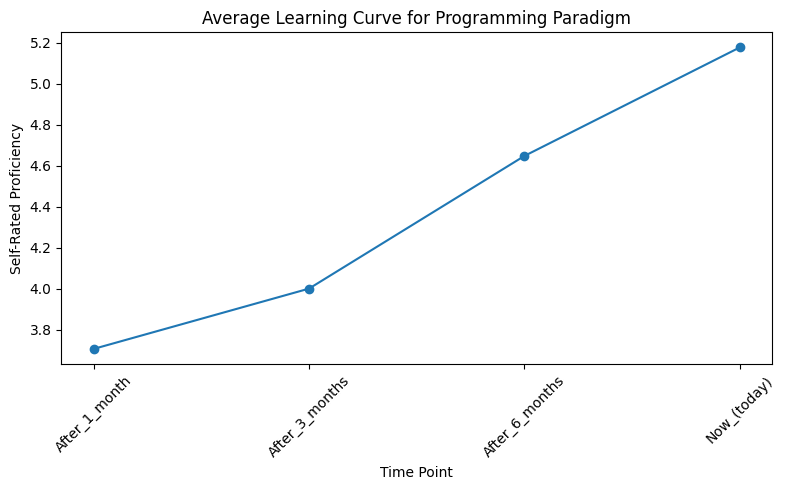

In [ ]:
#plotting the time series graph to further understand the learning curve

plt.figure(figsize=(8,5))
plt.plot(learning_curve_mean.index, learning_curve_mean.values, marker='o')
plt.xticks(rotation=45)
plt.title("Average Learning Curve for Programming Paradigm")
plt.xlabel("Time Point")
plt.ylabel("Self-Rated Proficiency")
plt.tight_layout()
plt.show()


- Observation
there is an upward trend indicating that the learning curve increases with dedication to learning as we can see progression across all time points

### **Difficulty Rating Distribution**

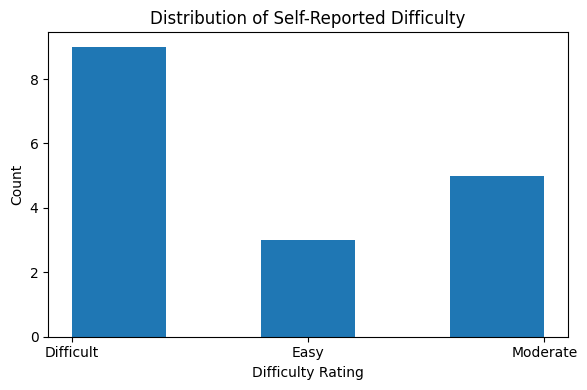

In [ ]:
difficulty_col = [c for c in data.columns if "difficulty" in c.lower()][0]

plt.figure(figsize=(6,4))
plt.hist(data[difficulty_col].dropna(), bins=5)
plt.title("Distribution of Self-Reported Difficulty")
plt.xlabel("Difficulty Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Hmm, majoirity of the responses appear to be ***difficult*** well i am not surprised programming isn't an easy task.

### **Experience by Years**

In [ ]:
# Define the mapping for categorical experience levels to numerical values
experience_mapping = {
    '0 years': 0,
    '<1 year': 0.5, # Midpoint of 0 and 1
    '1–2 years': 1.5, # Midpoint of 1 and 2
    '3–5 years': 4, # Midpoint of 3 and 5
    '6–10 years': 8, # Midpoint of 6 and 10
    'More than 10 years': 12 # A reasonable estimate for >10
}

# Renaming the column '11._Please_indicate_your_experience_level_with_each_programm' to 'Procedural/_Imperative' for clarity
data = data.rename(columns={'11._Please_indicate_your_experience_level_with_each_programm': 'Procedural/_Imperative'})

# Defining the columns representing experience levels for each paradigm, including the renamed one
exp_cols = ["Procedural/_Imperative", "Object-Oriented", "Functional", "Concurrent_/_Parallel", "Reactive_/_Event-driven"]

# Applying the robust conversion using the mapping
for col in exp_cols:
    data[col] = data[col].astype(str).str.strip().map(experience_mapping)

# Calculate the mean for these numeric experience columns
exp_stats = data[exp_cols].mean()

print("Average experience for each paradigm:")
print(exp_stats)

Average experience for each paradigm:
Procedural/_Imperative     2.205882
Object-Oriented            3.147059
Functional                 2.323529
Concurrent_/_Parallel      1.470588
Reactive_/_Event-driven    1.823529
dtype: float64


We can clearly see that procedural and object-oriented programming paradimgs take the lead with the higher means although functional has a high mean also, this could indicate high interest in this paradigm, now this is interesting.

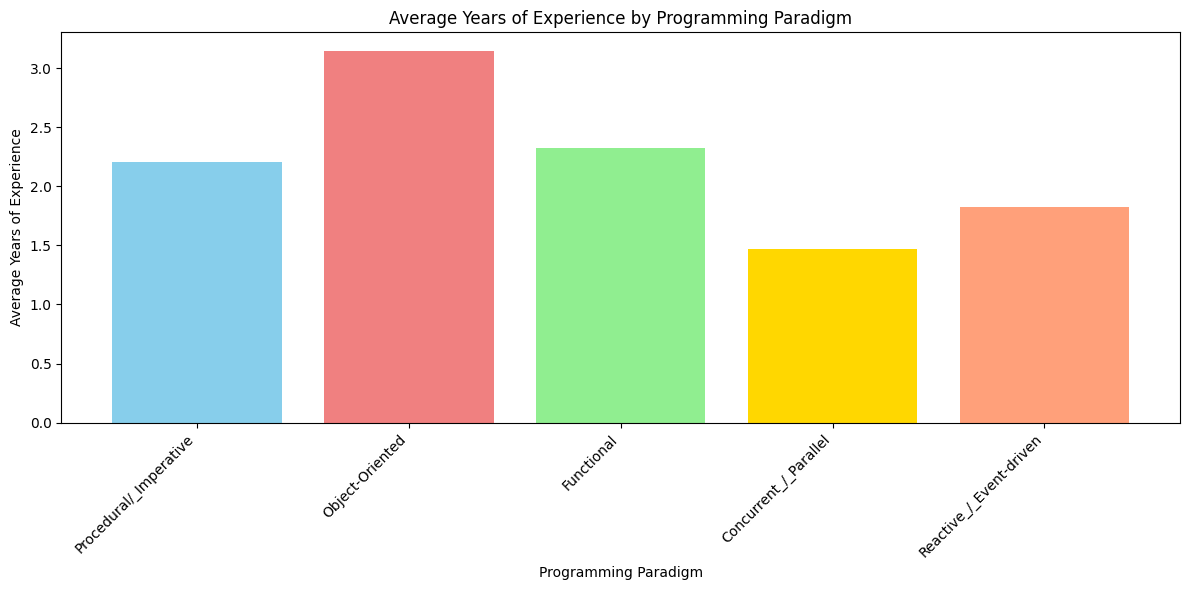

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(exp_stats.index, exp_stats.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Years of Experience by Programming Paradigm")
plt.xlabel("Programming Paradigm")
plt.ylabel("Average Years of Experience")
plt.tight_layout()
plt.show()

yes it becomes very obvious that OOP takes the lead.

## Exploring the Years of Experience utilizing an approach

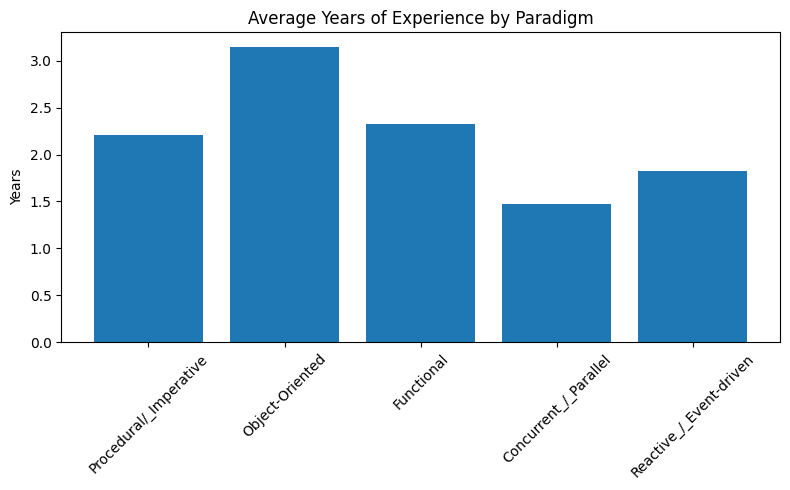

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(exp_stats.index, exp_stats.values)
plt.xticks(rotation=45)
plt.title("Average Years of Experience by Paradigm")
plt.ylabel("Years")
plt.tight_layout()
plt.show()


it seems that OOP is the most utilized paradigm in this dataset which means that traditional approach still takes the lead.

### **Correlation Analysis**

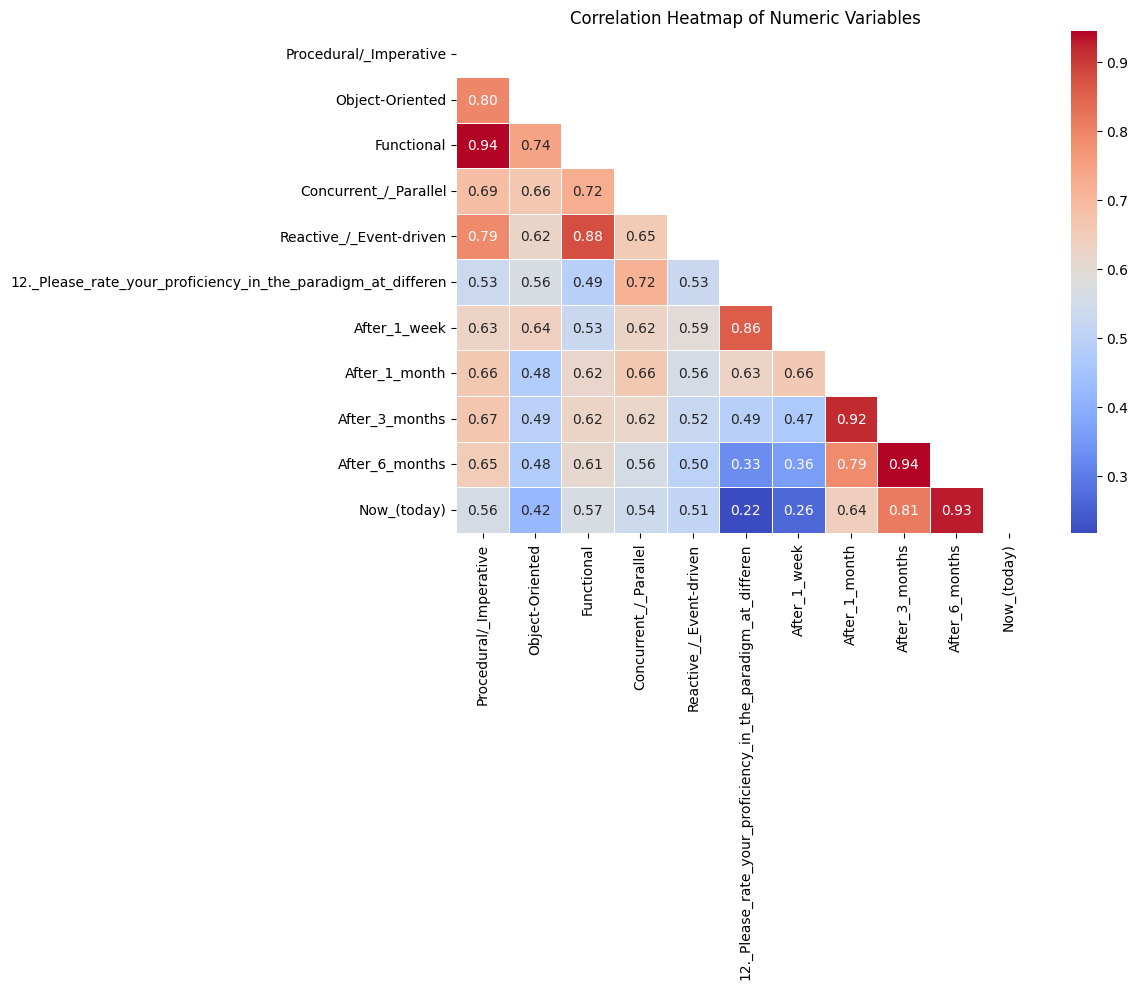

In [ ]:

#Calculating the correlation matrix
corr_matrix = data.select_dtypes(include=np.number).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10)) # Increased figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

we have some interesting positive correlation between traditional approach and the more modern approaches although at some point the correlation isnt really strong even though it is positive.

## **Inferential Statistics**

In [ ]:
# Define the mapping for categorical experience levels to numerical values
experience_mapping = {
    '0 years': 0,
    '<1 year': 0.5, # Midpoint of 0 and 1
    '1–2 years': 1.5, # Midpoint of 1 and 2
    '3–5 years': 4, # Midpoint of 3 and 5
    '6–10 years': 8, # Midpoint of 6 and 10
    'More than 10 years': 12 # A reasonable estimate for >10
}

hours_total_col = "5._How_many_total_years_of_general_programming_experience_do"

# Clean and map the 'total_years' column to numerical values
data[hours_total_col] = data[hours_total_col].astype(str).str[2:].str.strip().map(experience_mapping)

# Calculate the correlation
corr = data[hours_total_col].corr(data["Now_(today)"])
corr

np.float64(0.45201463942400777)

well the correlation doesnt appear to be positive with since its is less than 5

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(data["After_1_week"], data["Now_(today)"])

t_stat, p_val

(np.float64(-4.473606810475954), np.float64(0.0003839438159522258))

there appears to be a statistically signficant improvement based on self-proficieny although, we haven't really stated a null or alternate hypothesis, we will return to this later one.

### **Categorical Factor Impact (Motivation vs Performance)**

In [ ]:
motivation_col = [c for c in data.columns if "motivation" in c.lower()][0]

# Normalize motivation strings to lowercase and strip whitespace before grouping
data['normalized_motivation'] = data[motivation_col].astype(str).str.lower().str.strip()

motivation_performance = data.groupby('normalized_motivation')["Now_(today)"].mean()
motivation_performance

,Now_(today)
normalized_motivation,
academic course,4.333333
capacity building and job requirement,7.000000
how the logic is achieve,4.000000
job / academic,6.000000
job requirements,4.000000
passion,6.000000
personal interest,6.000000
personal interests,3.000000
project,6.000000


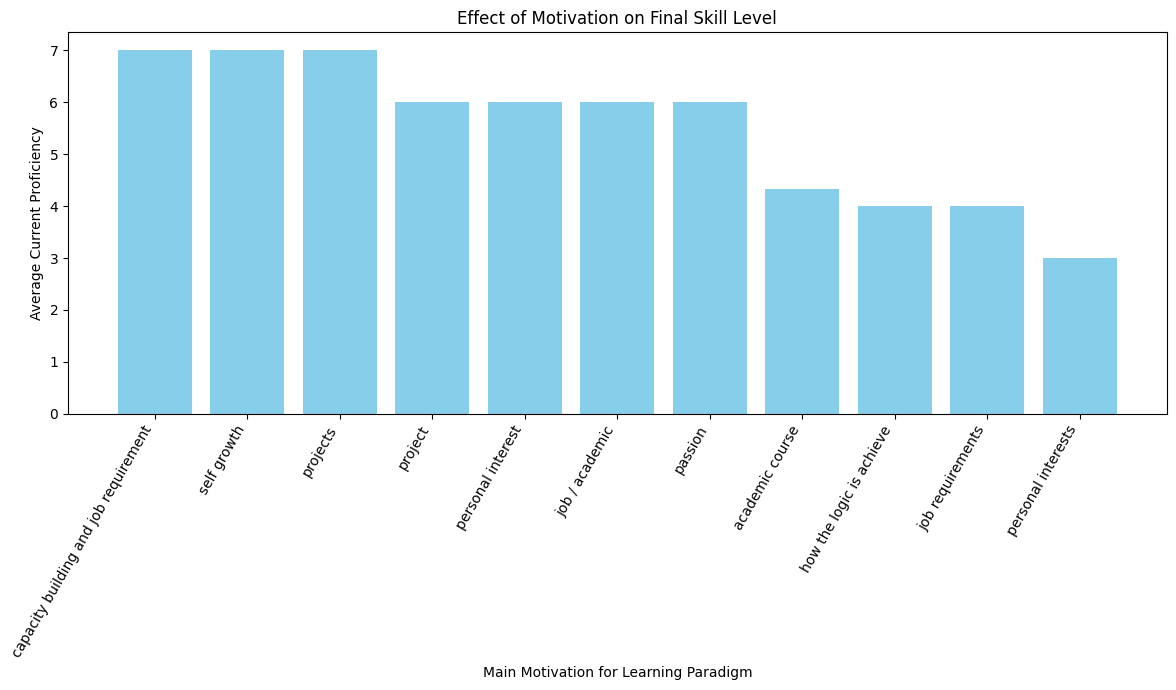

In [ ]:
# Sort the motivation performance by average proficiency for better visualization
motivation_performance_sorted = motivation_performance.sort_values(ascending=False)

plt.figure(figsize=(12, 7)) # Increased figure size for better readability of labels
plt.bar(motivation_performance_sorted.index, motivation_performance_sorted.values, color='skyblue')
plt.xticks(rotation=60, ha='right') # Rotate labels more for better readability
plt.title("Effect of Motivation on Final Skill Level")
plt.xlabel("Main Motivation for Learning Paradigm")
plt.ylabel("Average Current Proficiency")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

there appear to be equal levels for capacity building, self growth and projects, so this means that all these are very strong motivational factors for learning well in my experience this is paramount for learning any paradigm.

## **Thematic Analysis (Qualitative Questions)**
Free-text questions:

- Q14 Motivation (open field)

- Q19 First project built

- Q20 Additional comments

In [ ]:
#Basic preprocessing and Keyword extraction

import re
from collections import Counter

def clean_text(x):
    if isinstance(x, str):
        return re.sub(r"[^a-zA-Z0-9\s]", "", x.lower())
    return ""

text_data = data[motivation_col].fillna("").apply(clean_text)

words = " ".join(text_data).split()
freq = Counter(words).most_common(30)
freq


[('academic', 7),
 ('course', 6),
 ('job', 3),
 ('personal', 2),
 ('project', 2),
 ('capacity', 1),
 ('building', 1),
 ('and', 1),
 ('requirement', 1),
 ('projects', 1),
 ('passion', 1),
 ('interests', 1),
 ('self', 1),
 ('growth', 1),
 ('requirements', 1),
 ('interest', 1),
 ('how', 1),
 ('the', 1),
 ('logic', 1),
 ('is', 1),
 ('achieve', 1)]

In [ ]:
# Converting the frequency list to a DataFrame for tabular display
freq_df = pd.DataFrame(freq, columns=['Word', 'Frequency'])
print("Most Frequent Words (Thematic Analysis Table):")
display(freq_df)

Most Frequent Words (Thematic Analysis Table):


,Word,Frequency
0,academic,7
1,course,6
2,job,3
3,personal,2
4,project,2
5,capacity,1
6,building,1
7,and,1
8,requirement,1
9,projects,1


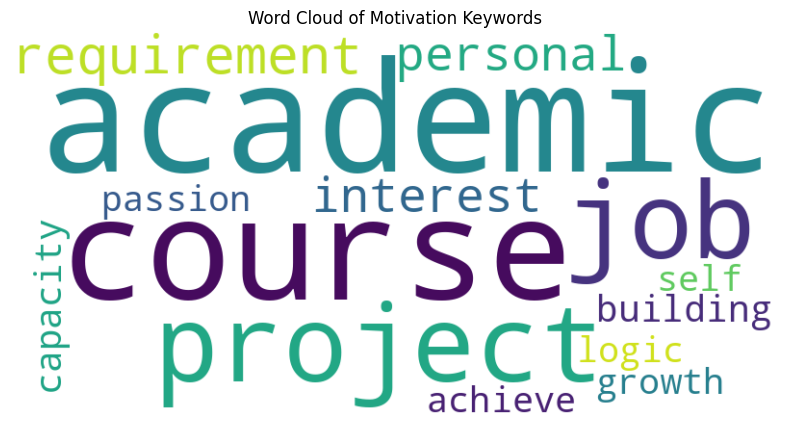

In [ ]:
#importing wordcloud library for better visual
from wordcloud import WordCloud

# Join all words to create a single string for the word cloud
words_string = " ".join(words)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words_string)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Motivation Keywords')
plt.show()

the words *"academic"* and *"Course"* appear to have the most recurring pattern and this should indicate that these are the course motivators for learning a programming paradigm, i think its best we refer to this as primary motivators.

## Conclusion

This analysis has successfully provided detailed empirical insights into how developers learn and adopt/apply new programming paradigms. Among the valuable insights is the upward trend in self-rated proficiency over time, indicating that consistent engagement improves skill proficiency, which is not far from the truth. The report observes that object-oriented programming (OOP) is the most explored paradigm, indicating that it still holds its place as a top pedagogical paradigm. However, it is further established that while many respondents percieve new paradigm adoption as difficult, there are still a couple of motivational factors that shape their learning experience *(that is, encouraging them to keep learning)* including 'capacity building, and job requirments as well as personal interest, and self-growth', and this is buttressed with the thematic analysis performed to identify patterns in recurring words that further indicate that programming paradigms are adopted through pedagogical means such as academic or course consumption. Therefore, the successful acquisition of programming paradigms is highly driven by a combination of factors, such as consistent effort, strong personal and career-oriented motivations, and leveraging existing programming knowledge. Even though developers continue to navigate the difficulties of learning new approaches, these factors will remain a significant influence on their success.

# Researchers:

Alfred Aminayanate Bob-Manuel,  
G2024/MSC/COMP/FT/041,   
University of Port Harcourt,   
Nigeria.  
alfred_bob-manuel@uniport.edu.ng.  

Elsie Siya Dokubo,  
G2024/MSC/COMP/FT/042,   
University of Port Harcourt,   
Nigeria.  
elsiedokubo5@gmail.com  
